In [4]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
import pandas_datareader.data as web
import datetime
listofcomp=['AAPL','GOOG','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year - 1,end.month,end.day)

for x in listofcomp:
    globals()[x]=web.DataReader(x, 'yahoo',start,end)

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,130.037620,126.992778,128.574524,128.544940,1.057460e+08,128.107680
std,10.577143,10.885578,10.663056,10.824771,4.342503e+07,10.973828
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.042498,118.949999,120.475000,120.679998,7.645492e+07,120.136076
50%,128.585007,126.165001,127.650002,127.329998,9.513970e+07,127.139507
75%,135.995003,133.522495,135.012497,134.555000,1.210929e+08,134.113113
max,153.250000,149.149994,150.229996,153.085007,3.326072e+08,153.085007


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-08-31 to 2021-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

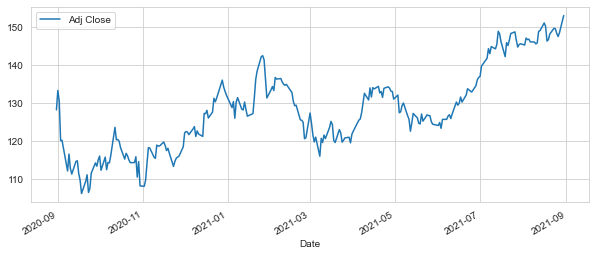

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

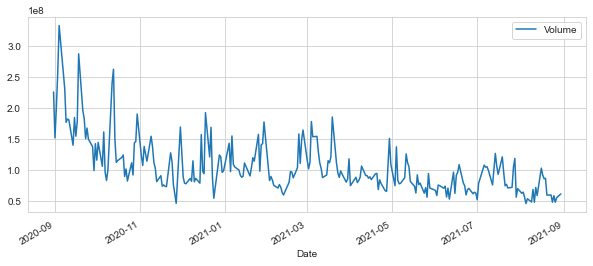

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

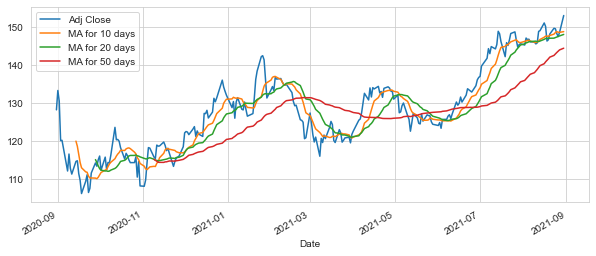

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

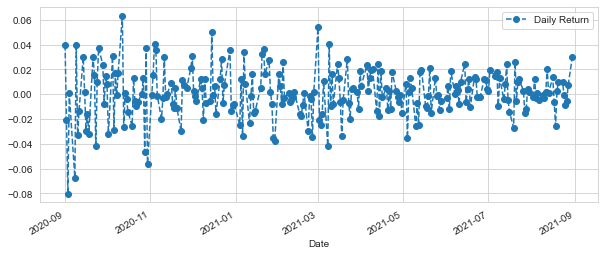

In [13]:
AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:>

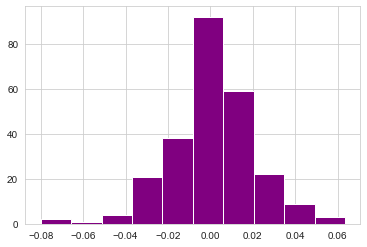

In [24]:
AAPL['Daily Return'].hist(color='purple')

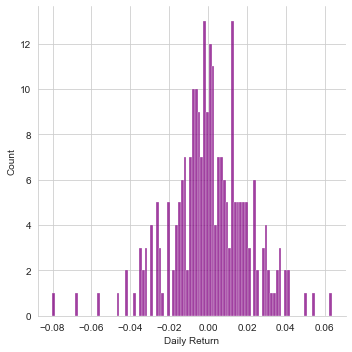

In [34]:
sns.displot(AAPL['Daily Return'].dropna(), bins = 100 , color = 'Purple')

In [35]:
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [36]:
closing_df = web.DataReader(listofcomp,'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-19,114.968048,1547.530029,207.793289,3260.479980
2020-08-20,117.519142,1581.750000,212.628922,3297.370117
2020-08-21,123.575188,1580.420044,211.083099,3284.719971
2020-08-24,125.053177,1588.199951,211.747009,3307.459961
2020-08-25,124.027283,1608.219971,214.501740,3346.489990


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-19,NaN,NaN,NaN,NaN
2020-08-20,0.022190,0.022113,0.023271,0.011314
2020-08-21,0.051532,-0.000841,-0.007270,-0.003836
2020-08-24,0.011960,0.004923,0.003145,0.006923
2020-08-25,-0.008204,0.012605,0.013010,0.011801


/Users/Mehak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


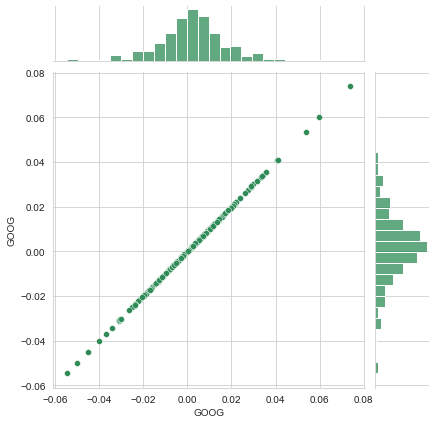

In [21]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/Mehak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


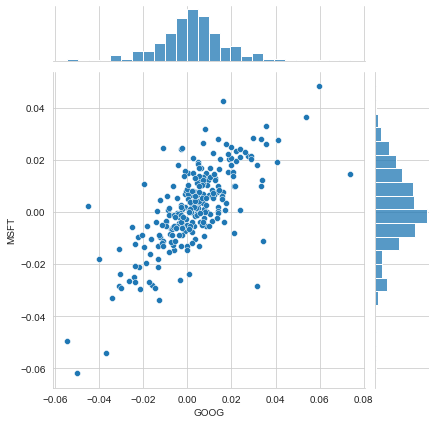

In [22]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

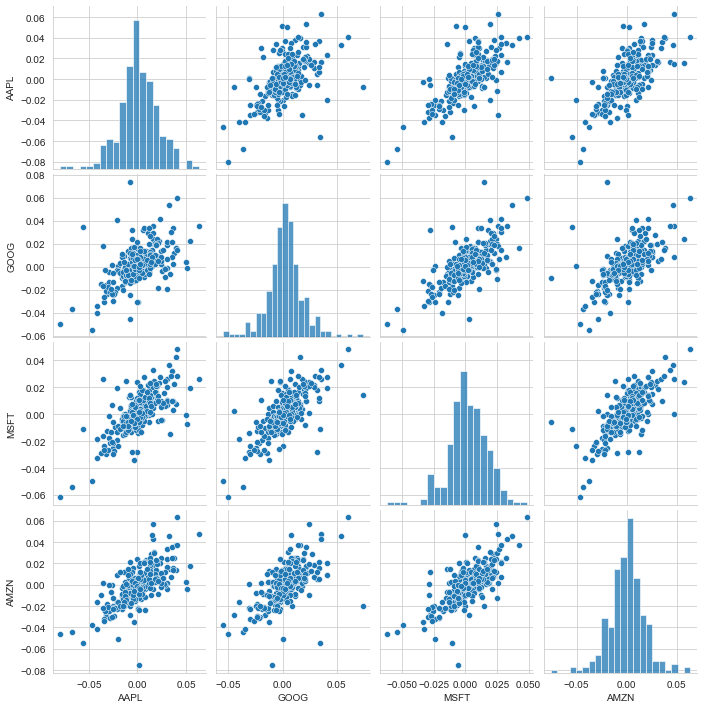

In [23]:
sns.pairplot(tech_rets.dropna())

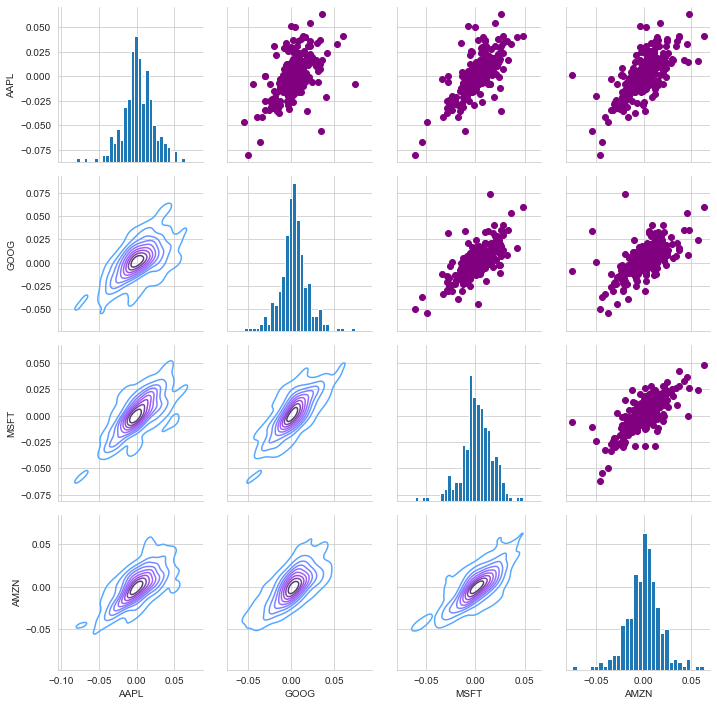

In [26]:

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. 

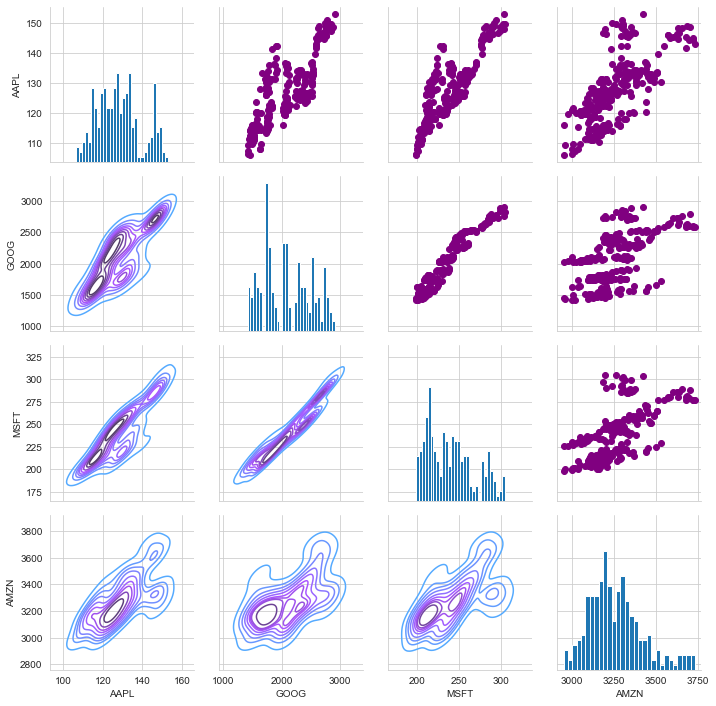

In [38]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

https://www.hackerearth.com/blog/developers/data-visualization-techniques/   : ALL THE PLOTS EXPLAINED WELL HERE.

In [ ]:
rets = tech_rets.dropna()

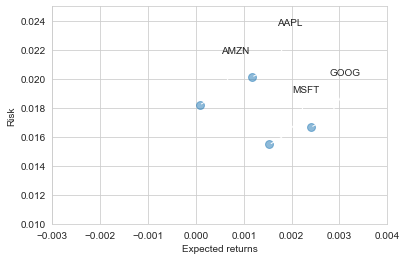

In [31]:
rets=tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                xy=(x,y), xytext = (50, 50),
                textcoords = 'offset points', ha = 'right', va= 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))


In [32]:
days = 365
dt =1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']


In [33]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt , scale=sigma*np.sqrt(dt))
        drift[x] =  mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

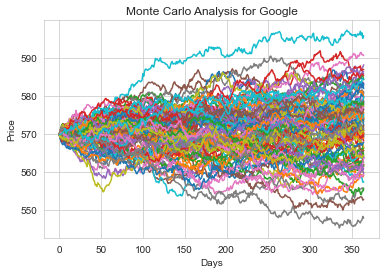

In [35]:
start_price = 569.85
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [36]:
runs = 1000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)
    [days - 1];

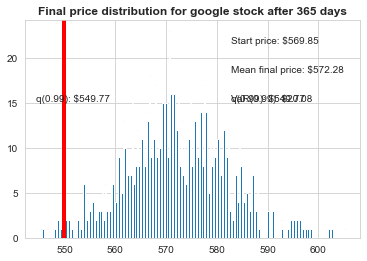

In [38]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins = 200)
plt.figtext(0.6, 0.8, s= 'Start price: $%.2f ' %start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6 , 'VaR(0.99): $%.2f'  % (start_price - q,))
plt.figtext(0.15, 0.6,  'q(0.99): $%.2f' % q)
plt.figtext(0.6,  0.6, 'q(0.99): $%.2f' % q)
plt.axvline(x=q , linewidth= 4, color='r')

plt.title('Final price distribution for google stock after %s days' % days,weight='bold');